In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data_path="Ecommerce Customers.csv"
data=pd.read_csv(data_path)

data=data.drop(['Email','Address','Avatar'],axis=1)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


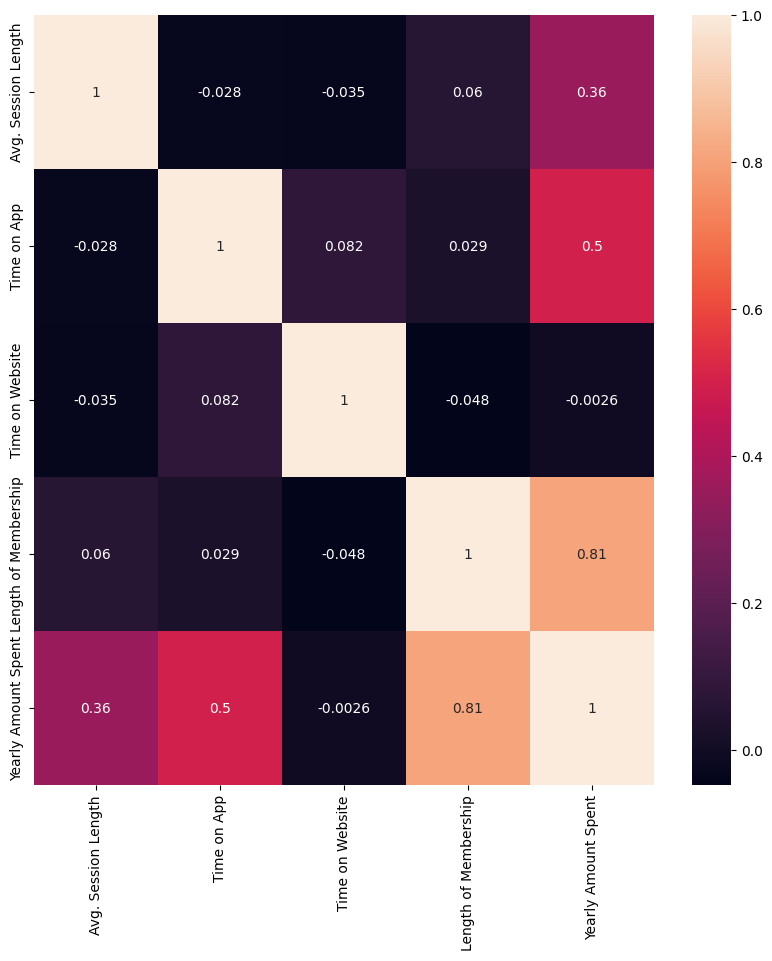

In [3]:
#Finding the top two important features using correlation matrix
correlation_matrix=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

#The two best features appear to be "Time on app" and "Length of member ship"

In [4]:
features=["Time on App","Length of Membership"]
target=["Yearly Amount Spent"]

X=data[features]
y=data[target]

print(X.head())
print(y.head())

   Time on App  Length of Membership
0    12.655651              4.082621
1    11.109461              2.664034
2    11.330278              4.104543
3    13.717514              3.120179
4    12.795189              4.446308
   Yearly Amount Spent
0           587.951054
1           392.204933
2           487.547505
3           581.852344
4           599.406092


In [5]:
def linear_regression(w,X,b):
    z=np.dot(X,w)+b
    return z

def initialize_weights(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b

In [6]:
def cost_function(y,y_hat):
    n=len(y)
    loss=np.sum(np.square(y_hat-y))
    return loss/n

def gradients(y,y_hat,X):
    n=len(y)
    dw=np.sum(np.matmul(X.T,y_hat-y))/n
    db=np.sum(y_hat-y)/n
    return dw,db

In [7]:
scaler=StandardScaler()
X=np.array(scaler.fit_transform(X))
y=np.array(y)

In [8]:
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,shuffle=True)

In [9]:
def fit(X,y,num_iterations,learning_rate):
    loss=[]
    weights=[]
    w,b=initialize_weights(X.shape[1])
    for i in range(num_iterations):
        y_hat=linear_regression(w,X,b)
        if(i%100==0):
            print(f"The loss after {i} iterations: {cost_function(y,y_hat)}")
        loss.append(cost_function(y,y_hat))
        weights.append(w)
        dw,db=gradients(y,y_hat,X)
        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)
    
    return loss,w,b

loss,w,b=fit(X_train,y_train,2500,0.01)

The loss after 0 iterations: 258116.85036495654
The loss after 100 iterations: 34477.043395027715
The loss after 200 iterations: 5516.073580978726
The loss after 300 iterations: 1643.1701589142115
The loss after 400 iterations: 1123.5826438216154
The loss after 500 iterations: 1053.8528883800548
The loss after 600 iterations: 1044.4947158142227
The loss after 700 iterations: 1043.238786267999
The loss after 800 iterations: 1043.0702320460855
The loss after 900 iterations: 1043.0476109311985
The loss after 1000 iterations: 1043.0445750248034
The loss after 1100 iterations: 1043.0441675856614
The loss after 1200 iterations: 1043.0441129045769
The loss after 1300 iterations: 1043.0441055660062
The loss after 1400 iterations: 1043.0441045811203
The loss after 1500 iterations: 1043.0441044489419
The loss after 1600 iterations: 1043.0441044312026
The loss after 1700 iterations: 1043.044104428822
The loss after 1800 iterations: 1043.0441044285024
The loss after 1900 iterations: 1043.044104428

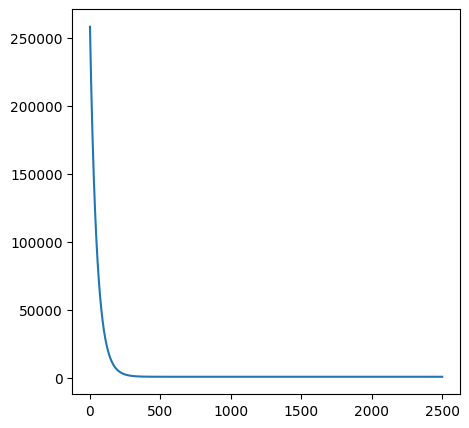

In [10]:
plt.figure(figsize=(5,5))
sns.lineplot(data=loss)
plt.show()

In [11]:
def prediction(w,X,b):
    predictions=linear_regression(w,X,b)
    return predictions

y_hat=prediction(w,X_val,b)
mean_squared_error(y_hat,y_val)

1099.135293655247

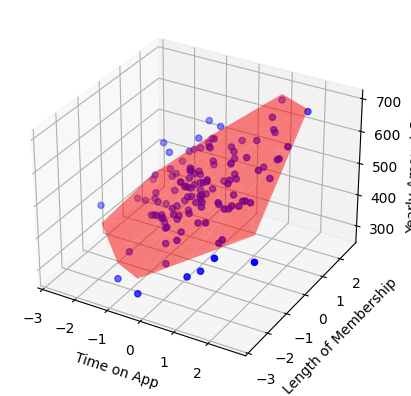

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=X_val[:,0]
y=X_val[:,1]
z=y_val
ax.scatter(x,y,z,c='b',marker='o')

z_pred = prediction(w,X_val,b)
z_pred=z_pred.reshape(x.shape)
ax.plot_trisurf(x,y,z_pred,color='r',alpha=0.5)

ax.set_xlabel('Time on App')
ax.set_ylabel('Length of Membership')
ax.set_zlabel('Yearly Amount Spent')

plt.show()